# Sequential Synthesis

In [1]:
# stdlib
import warnings

warnings.filterwarnings("ignore")

# third party
from sklearn.datasets import load_diabetes

# synthcity absolute
from synthcity.plugins import Plugins

from synthcity.plugins.core.dataloader import Syn_SeqDataLoader

eval_plugin = "syn_seq"

[KeOps] Warning : omp.h header is not in the path, disabling OpenMP. To fix this, you can set the environment
                  variable OMP_PATH to the location of the header before importing keopscore or pykeops,
                  e.g. using os.environ: import os; os.environ['OMP_PATH'] = '/path/to/omp/header'
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


### Load dataset


In [2]:
# synthcity absolute
from synthcity.plugins.core.dataloader import GenericDataLoader

X, y = load_diabetes(return_X_y=True, as_frame=True)
X["target"] = y

loader = Syn_SeqDataLoader(X, target_column="target", sensitive_columns=["sex"])

loader.dataframe()


[INFO] Syn_SeqEncoder summary:
  (column, method)

  (age, swr)
    --> 
  (sex, cart)
    --> 
  (bmi, cart)
    --> 
  (bp, cart)
    --> 
  (s1, cart)
    --> 
  (s2, cart)
    --> 
  (s3, cart)
    --> 
  (s4, cart)
    --> 
  (s5, cart)
    --> 
  (s6, cart)
    --> 
  (target, cart)

  - variable_selection_:
        age  sex  bmi  bp  s1  s2  s3  s4  s5  s6  target
age       0    0    0   0   0   0   0   0   0   0       0
sex       1    0    0   0   0   0   0   0   0   0       0
bmi       1    1    0   0   0   0   0   0   0   0       0
bp        1    1    1   0   0   0   0   0   0   0       0
s1        1    1    1   1   0   0   0   0   0   0       0
s2        1    1    1   1   1   0   0   0   0   0       0
s3        1    1    1   1   1   1   0   0   0   0       0
s4        1    1    1   1   1   1   1   0   0   0       0
s5        1    1    1   1   1   1   1   1   0   0       0
s6        1    1    1   1   1   1   1   1   1   0       0
target    1    1    1   1   1   1   1   1   1

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


### Train the generator


In [3]:
# synthcity absolute
from synthcity.plugins import Plugins

syn_model = Plugins().get(eval_plugin)

syn_model.fit(loader)

[2025-02-18T23:57:46.842895+0900][4528][CRITICAL] module disabled: /Users/minkeychang/synthcity/src/synthcity/plugins/generic/plugin_goggle.py


[INFO] Syn_Seq aggregator: fitting columns...
Fitting 'age' => stored distribution from real data. Done.
Fitting 'sex' with 'cart' ... Done!
Fitting 'bmi' with 'cart' ... Done!
Fitting 'bp' with 'cart' ... Done!
Fitting 's1' with 'cart' ... Done!
Fitting 's2' with 'cart' ... Done!
Fitting 's3' with 'cart' ... Done!
Fitting 's4' with 'cart' ... Done!
Fitting 's5' with 'cart' ... Done!
Fitting 's6' with 'cart' ... Done!
Fitting 'target' with 'cart' ... Done!


### Generate new samples


In [4]:
syn_model.generate(count=10).dataframe()

Generating 'age' => done.
Generating 'sex' => done.
Generating 'bmi' => done.
Generating 'bp' => done.
Generating 's1' => done.
Generating 's2' => done.
Generating 's3' => done.
Generating 's4' => done.
Generating 's5' => done.
Generating 's6' => done.
Generating 'target' => done.


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.041708,-0.044642,-0.007284,0.028758,-0.042848,-0.048286,0.052322,-0.076395,-0.072133,0.023775,182.0
1,-0.078165,0.050680,0.077863,0.052858,0.078236,0.064447,0.026550,-0.002592,0.040673,-0.009362,233.0
2,0.059871,-0.044642,-0.000817,-0.084856,0.075484,0.079478,0.004460,0.034309,0.023371,0.027917,115.0
3,0.056239,0.050680,-0.030996,0.008101,0.019070,0.021233,0.033914,-0.039493,-0.029526,-0.059067,91.0
4,0.070769,-0.044642,0.012117,0.042529,0.071357,0.053487,0.052322,-0.002592,0.025395,-0.005220,143.0
5,-0.052738,0.050680,-0.040696,-0.067642,-0.031840,-0.037013,0.037595,-0.039493,-0.034522,0.069338,42.0
6,0.027178,0.050680,0.017506,-0.033213,-0.007073,0.045972,-0.065491,0.071210,-0.096435,-0.059067,69.0
7,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
8,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,310.0
9,0.092564,-0.044642,0.036907,0.021872,-0.024960,-0.016658,0.000779,-0.039493,-0.022517,-0.021788,70.0


Generating 'age' => done.
Generating 'sex' => done.
Generating 'bmi' => done.
Generating 'bp' => done.
Generating 's1' => done.
Generating 's2' => done.
Generating 's3' => done.
Generating 's4' => done.
Generating 's5' => done.
Generating 's6' => done.
Generating 'target' => done.


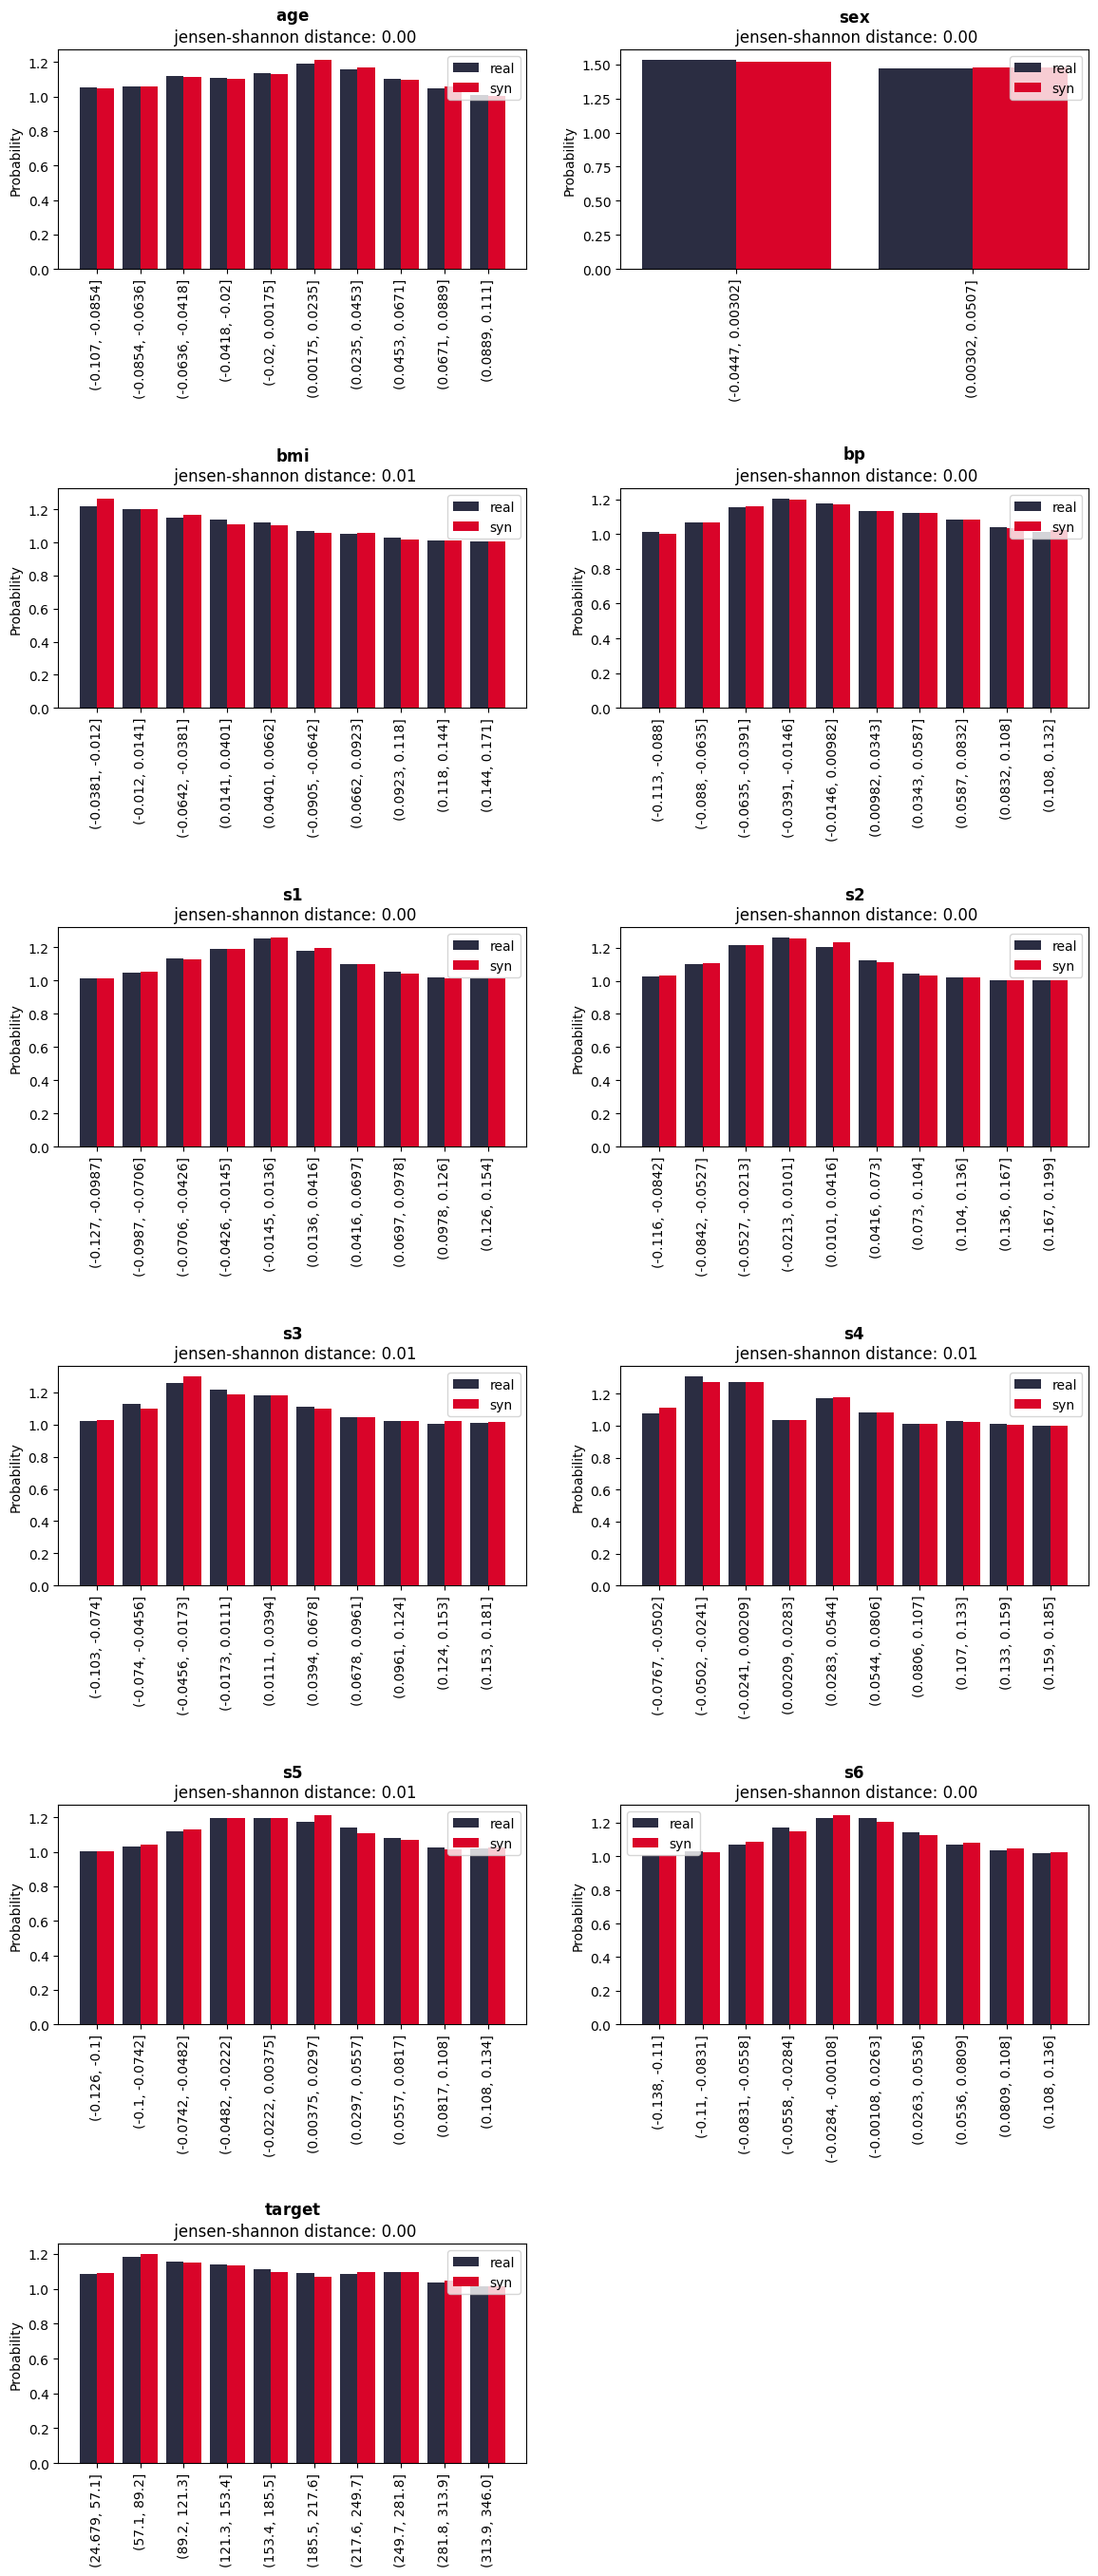

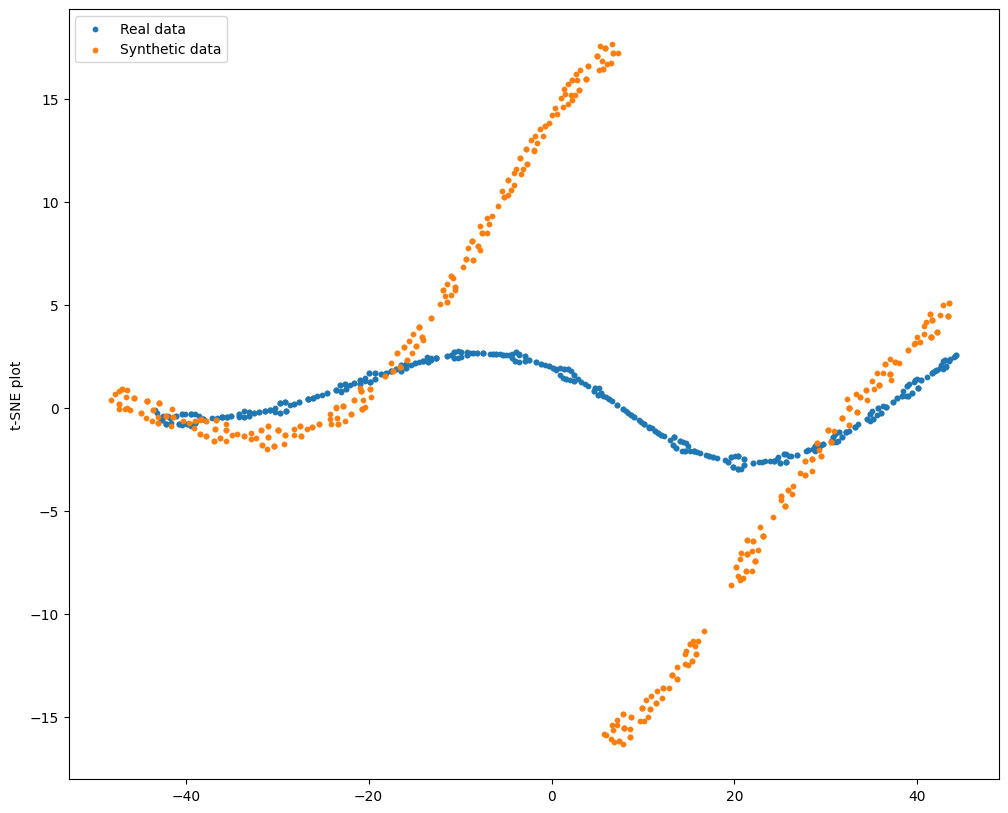

In [5]:
# third party
import matplotlib.pyplot as plt

syn_model.plot(plt, loader)

plt.show()

### Benchmarks

In [6]:
# synthcity absolute
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [
        (eval_plugin, eval_plugin, {"n_iter": 50})
    ],  # (testname, plugin, plugin_args) REPLACE {"n_iter" : 50} with {} for better performance
    loader,
    repeats=2,
    metrics={"detection": ["detection_mlp"]},  # DELETE THIS LINE FOR ALL METRICS
)

In [7]:
Benchmarks.print(score)


Plugin : syn_seq


,min,max,mean,stddev,median,iqr,rounds,errors,durations
detection.detection_mlp.mean,0.542593,0.56358,0.553086,0.010494,0.553086,0.010494,2,0,0.0
